# Recommender Systems using Python


#### We are going to create a recommender system for movie using python which was refered from Pierian Data 

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

In [2]:
col_name=['User_Id','item_id','Rating','TimeStamp']

In [3]:
data=pd.read_csv('u.data',names=col_name,sep='\t')

In [4]:
data.head()

,User_Id,item_id,Rating,TimeStamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Now we need to map the Movie names in Movie_Id_Titles file to the DataSet based on the Movie_Id

In [5]:
movie_names=pd.read_csv('Movie_Id_Titles')

In [6]:
movie_names.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [7]:
data=pd.merge(data,movie_names,on='item_id')

In [8]:
data

,User_Id,item_id,Rating,TimeStamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# EDA (Exploratory Data Analysis)

In [9]:
data.shape

(100003, 5)

#### Number of tickets bought based on movie

In [10]:
data['title'].value_counts()

Star Wars (1977)                   584
Contact (1997)                     509
Fargo (1996)                       508
Return of the Jedi (1983)          507
Liar Liar (1997)                   485
                                  ... 
Leopard Son, The (1996)              1
Stefano Quantestorie (1993)          1
Quartier Mozart (1992)               1
Reluctant Debutante, The (1958)      1
Dadetown (1995)                      1
Name: title, Length: 1664, dtype: int64

#### Number of tickets bought based on user_id

In [11]:
data['User_Id'].value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
888     20
571     20
242     20
441     20
0        3
Name: User_Id, Length: 944, dtype: int64

### We shall create a dataframe with no of ratings and avg rating for each movie

In [12]:
data.groupby('title')['Rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: Rating, dtype: float64

In [13]:
data.groupby('title')['Rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

In [14]:
ratings=pd.DataFrame(data=data.groupby('title')['Rating'].count())

In [15]:
ratings['mean_rating']=data.groupby('title')['Rating'].mean()

In [16]:
ratings

,Rating,mean_rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


<AxesSubplot:>

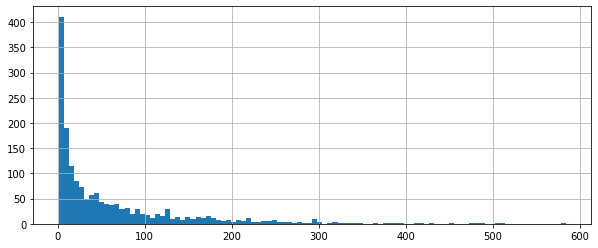

In [17]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=100)

Nearly 400+ movies are rated by 1-10 peoples. Their ratings are not a much of use.

<AxesSubplot:>

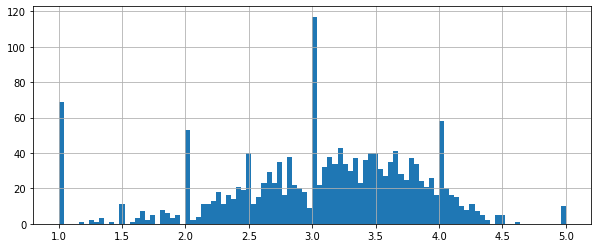

In [18]:
plt.figure(figsize=(10,4))
ratings['mean_rating'].hist(bins=100)

A large amount of movie is rated average(3.0), while a large amount of movie is rated bad(1.0)

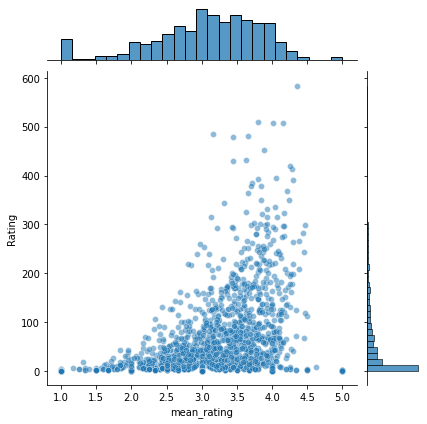

In [19]:
sns.jointplot(x='mean_rating',y='Rating',data=ratings,alpha=0.5)

#### Most of the ratings have a little number of responses even the highest rated movie has little rating, the movies with a large amount of responses and a good rating are the good data to be used.

## Now let us start building the recommender system

#### Now let us create a table that contains the rating of every user to every movie(If the user has not seen the movie it will be NaN)

##### We can see that most of the values are NaN as not all of them have watched all the movies

In [20]:
movie_table = data.pivot_table(index='User_Id',columns='title',values='Rating')
movie_table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_Id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Let us find the movies that most number of peoples have watched

In [21]:
ratings.sort_values('Rating',ascending=False).head(10)

,Rating,mean_rating
title,,
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
"English Patient, The (1996)",481,3.656965
Scream (1996),478,3.441423
Toy Story (1995),452,3.878319
Air Force One (1997),431,3.631090


#### Now we select 2 movie from the List and try to recommed movie based on the user's activity

In [23]:
contact_user_ratings = movie_table['Contact (1997)']
fargo_user_ratings = movie_table['Fargo (1996)']
print(contact_user_ratings.head())
print(fargo_user_ratings.head())

User_Id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64
User_Id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64


In [24]:
similar_to_contact = movie_table.corrwith(contact_user_ratings)
similar_to_fargo = movie_table.corrwith(fargo_user_ratings)

C:\Users\Kishore G K\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Kishore G K\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Kishore G K\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Kishore G K\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### We use Correlation to find the most correlated movie

In [25]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [26]:
corr_fargo = pd.DataFrame(similar_to_fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


#### We get many movies because there are lots of movies that only one person has watched and this movie

In [27]:
corr_contact.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lamerica (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Contact (1997),1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
For Ever Mozart (1996),1.0
Faust (1994),1.0
Fausto (1993),1.0


In [28]:
corr_contact = corr_contact.join(ratings['Rating'])

In [29]:
corr_fargo = corr_fargo.join(ratings['Rating'])

In [30]:
corr_contact.head()

,Correlation,Rating
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [31]:
corr_fargo.head()

,Correlation,Rating
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


### If we pick movies that are rated by a good amount of people the recommendations may be more good

In [32]:
corr_contact[corr_contact['Rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Rating
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


In [35]:
corr_fargo[corr_fargo['Rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Rating
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173


##### Now we can say that the people who likes Contact can also view Philadelphia as their next movie, while for people who watch Fargo, Sling Blade will be a good choice.